# 10.1 Final Analysis Questions (Code Answers Tasks 5-10)

# Import Libraries, Datasets

# Additional Setup

### - Pandas warnings and settings

### - Merging departments with main dataset

# User Profile for Age groups

## Income_group:Profile Creation

### - Sampling Data Set

## Age_group: Profile and Visualizations

# User Profile for Income Groups 

# User Profile for Family Status

# Profile for Department goods

# Profile for Loyalty Flag

# Department and Product Further Analysis

### Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

## Top 10 Produce Items subset

# Exporting Data

------------

# Import Libraries, Datasets and Set PD code

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
#pathway to datasets
path =(r'C:\Users\colmu\Desktop\Career Foundry\Achievement 4\Instacart Basket Analysis')

In [3]:
#Importing dataset departments_wrangled
df_depts=pd.read_csv(os.path.join(path, 'data','Prepared Data','departments_wrangled.csv'))
df_depts.shape

(21, 2)

In [4]:
#Importing dataset orders_products_active
ords_prods_active=pd.read_pickle(os.path.join(path, 'data','Prepared Data','orders_products_active.pkl'))
ords_prods_active.shape

(30964564, 29)

In [3]:
#Import Dataset Orders_products_departments_active.pkl
df_opd=pd.read_pickle(os.path.join(path, 'data','Prepared Data','Orders_products_departments_active.pkl'))
df_opd.shape

(30964564, 30)

# Additional Setup

-------

### - Pandas warnings and settings

In [4]:
#creating PD setting, display max columns 100 and max rows 100
pd.set_option('display.max_rows', 100, 'display.max_columns', 100,)

In [5]:
#supressing scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
#turning of warning feature
import warnings
warnings.filterwarnings('ignore')

### - Merging Depertments with main dataset

Merging df_depts with ords_prods_active to get department names for analysis

In [8]:
#check
df_depts.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
#rennaming unnamed column to department_id
df_depts.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_depts.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
# use inner join to combine df_ords_prods_active with department to get the names of departments.OPD/ords_products_departments
df_opd = ords_prods_active.merge(df_depts, on='department_id', indicator=True)

In [11]:
#check value counts of _merge
df_opd['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [12]:
df_opd.head(5)

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Gender,state_usa,Age,date_joined,n_dependants,fam_status,income,price_range_loc,busiest_period_of_day,busiest_days,loyalty_flag,spending_flag,FRQ_prior_order_flag,regional_flag,max_order,Customer_activity,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,regularly busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,both


------

# User Profile for Age groups

## Age_group:Profile Creation

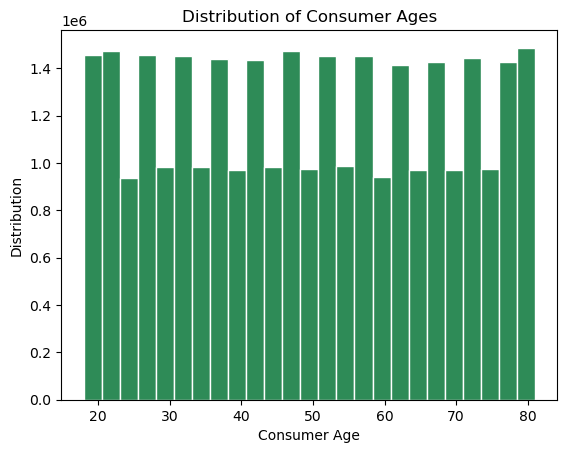

In [28]:
# creating histogram object to show distribution of consumer ages to determine flag criteria
age_histogram =df_age['Age'].plot.hist(title='Distribution of Consumer Ages', xlabel='Consumer Age', ylabel='Distribution', color='seagreen', edgecolor='white',bins =25)
plt.savefig('age_histogram.png')
plt.show()

no criteria was provided for grouping consumer ages. Given frequency of ages consumers will be grouped into groups of 10 with the exceptions of 68 and old which will include 77-81 yos

In [7]:
#creation of age_group flag to group ages together by inciments of 10 
df_opd.loc[(df_opd['Age'] >=18) & (df_opd['Age'] <28), 'age_group'] = '18_27'
df_opd.loc[(df_opd['Age'] >=28) & (df_opd['Age'] <38), 'age_group'] = '28_37'
df_opd.loc[(df_opd['Age'] >=38) & (df_opd['Age'] <48), 'age_group'] = '38_47'
df_opd.loc[(df_opd['Age'] >=48) & (df_opd['Age'] <58), 'age_group'] = '48_57'
df_opd.loc[(df_opd['Age'] >=58) & (df_opd['Age'] <68), 'age_group'] = '58_67'
df_opd.loc[(df_opd['Age'] >=68), 'age_group'] = '68_over'

#checking for NaN values
df_opd['age_group'].value_counts(dropna = False) 

age_group
68_over    6803697
48_57      4895823
18_27      4855481
38_47      4846608
28_37      4831591
58_67      4731364
Name: count, dtype: int64

### - Sampling Data Set

Creating sample data set for profile creation and data exporation of user profiles. Profiles will indicate if they are pulling from the sample data set to run their anaylsis and a 70/30 split will be used to sample the Orders_products_departments_active.pkl file

In [42]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_opd_big = df_opd[dev]
df_opd_small = df_opd[~dev]

#quality check
len(df_opd_big)+len(df_opd_small)

30964564

In [18]:
len(df_opd_big)

21676096

In [20]:
len(df_opd_small)

9288468

In [10]:
#quality check of main dataset
len(df_opd)

30964564

## Age_group: Profile and Visualizations

In [43]:
# user_profile of subset of 30% sample df_opd_small only containing necessary columns for analysis
df_age_group_sample = df_opd_small[['Age','regional_flag','age_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_age_group_sample.shape

(9288468, 8)

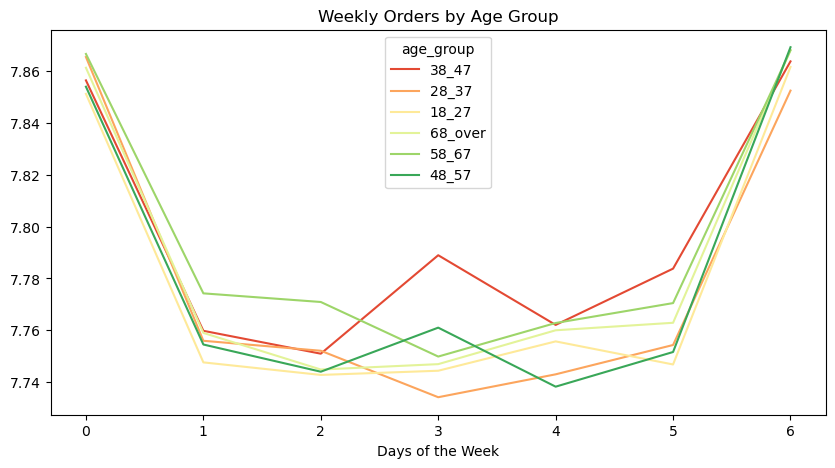

In [46]:
#linechart for DOW and age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Weekly Orders by Age Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Age_group_dow.png')
plt.show()

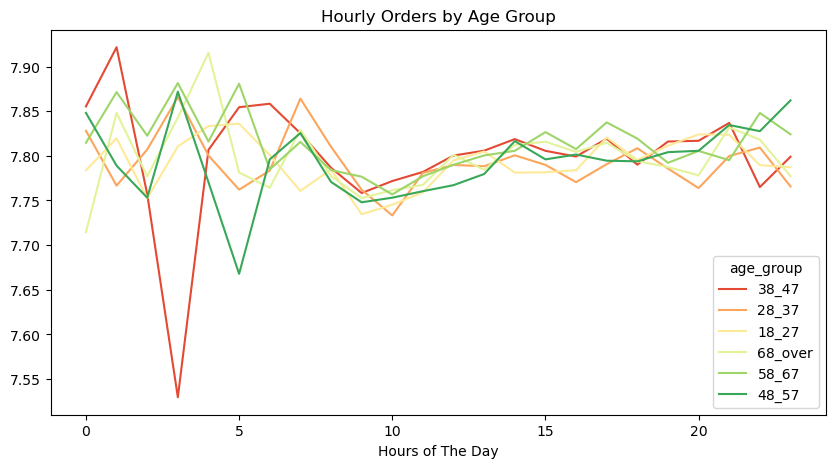

In [45]:
#linechart for HOD and age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Hourly Orders by Age Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Age_group_HOD.png')
plt.show()

## Age_group:Regional_flag and Department Analysis

In [44]:
#aggregating 'order_id' and 'prices' from sample
df_age_group_sample_agg = df_age_group_sample.groupby(['department', 'age_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_age_group_sample_agg.head(3)

,department,age_group,regional_flag,order_id,prices
0,alcohol,18_27,Midwest,984,7980.70
1,alcohol,18_27,Northeast,1191,9515.90
2,alcohol,18_27,South,1834,15248.90


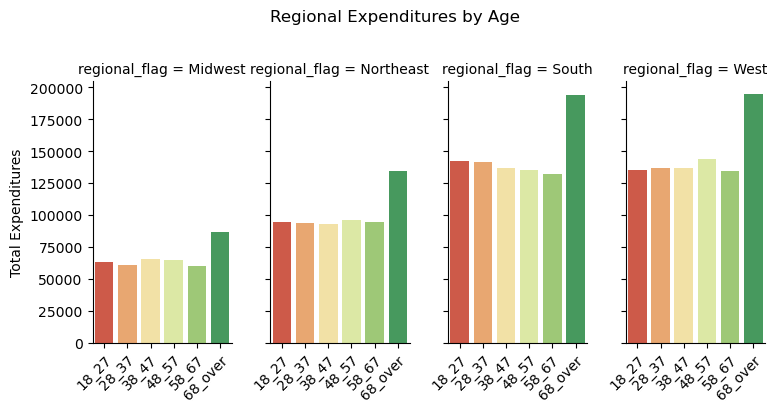

In [45]:
### FacetGrid for age_group and Revenue
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "prices", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Age")
g.figure.subplots_adjust(top=.8)

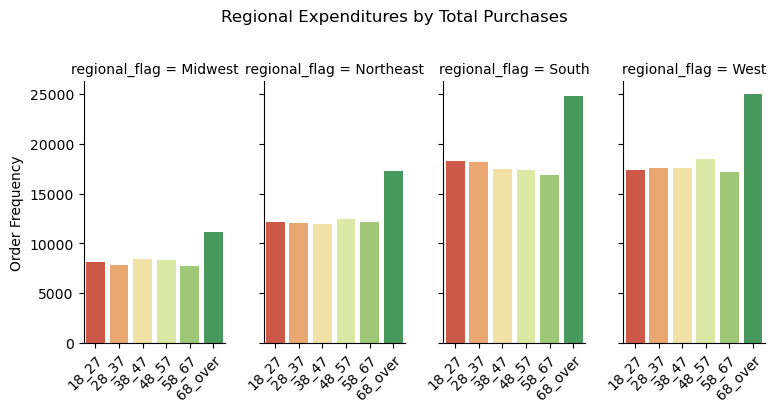

In [46]:
# FacetGrid for age_group and Total Purchases
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "order_id", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases")
g.figure.subplots_adjust(top=.8)

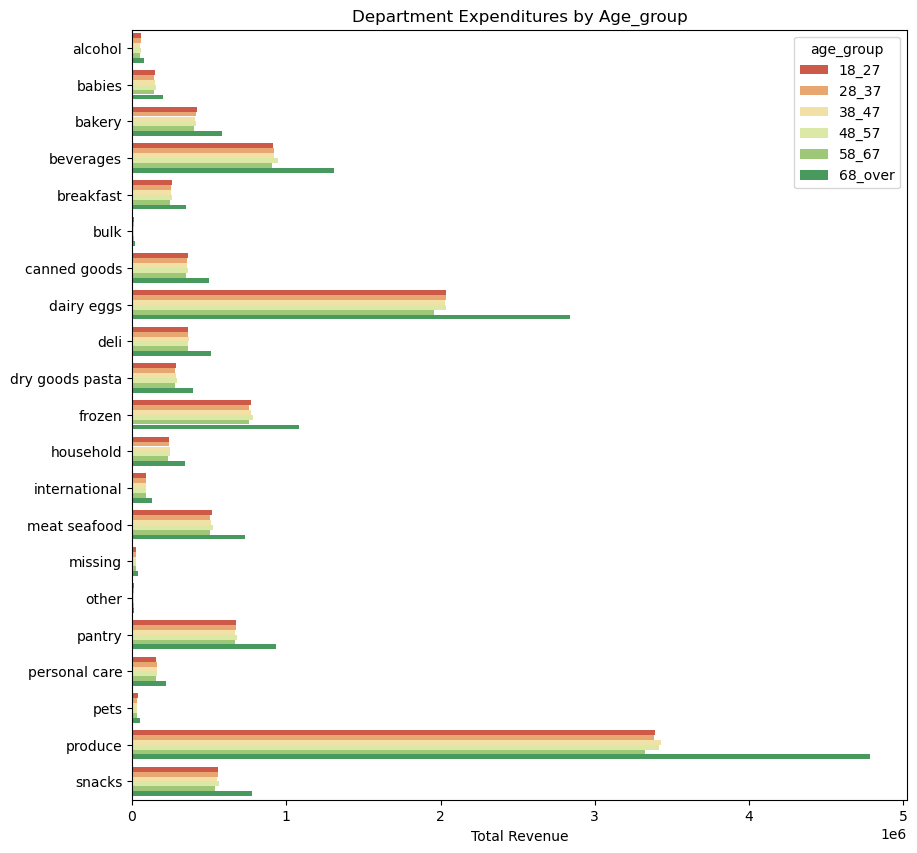

In [104]:
#barplot for Age-group and departments expenditures and frequency
plt.figure(figsize=(10, 10))

sns.barplot(data = df_age_group_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='age_group', 
             palette = 'RdYlGn',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Age_group")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('Age_group_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

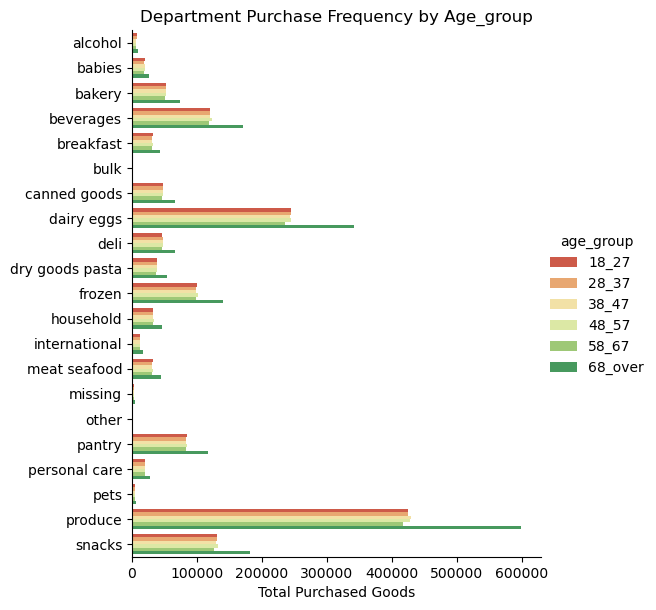

In [106]:
#barplot for Age-group and departments expenditures and frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_age_group_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='age_group', 
             errorbar="sd",
             palette = 'RdYlGn',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Age_group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('Age_group_freq_purchases.png')
plt.show()

## Age_group: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [76]:
# aggregated Data from TOTAL Dataset for age_group 
df_opd.groupby('age_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order              prices                
               mean max min         sum mean   max  min
age_group                                              
18_27         34.52  99   5 37789878.50 7.78 25.00 1.00
28_37         34.38  99   5 37610637.80 7.79 25.00 1.00
38_47         34.30  99   5 37781180.50 7.80 25.00 1.00
48_57         34.65  99   5 38103185.60 7.78 25.00 1.00
58_67         34.25  99   5 36897706.30 7.80 25.00 1.00
68_over       34.44  99   5 53011646.90 7.79 25.00 1.00

# User Profile for Income Groups 

----

## Income_group: Creating Flag for Income Groups 

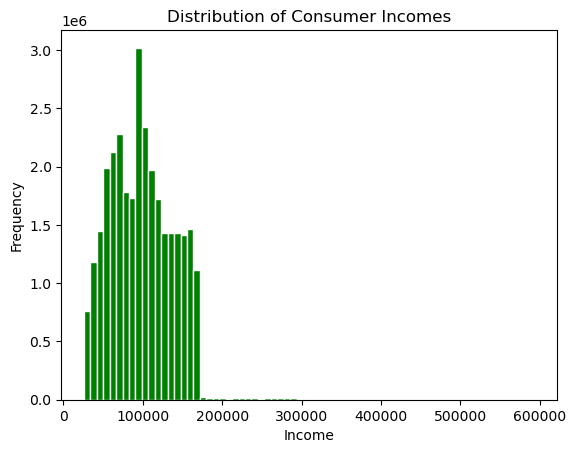

In [8]:
# creating histogram object
income_histogram = df_opd['income'].plot.hist(title='Distribution of Consumer Incomes', xlabel='Income', ylabel='Frequency', color='green', edgecolor='white',bins =70)
plt.savefig('income_histogram.png')
plt.show()

In [9]:
#Descriptives of income column
df_opd['income'].describe()

count   30964564.00
mean       99675.87
std        43141.87
min        25903.00
25%        67292.00
50%        96765.00
75%       128102.00
max       593901.00
Name: income, dtype: float64

Given the spread of incomes having a left skew, quartiles wll be used to divide clients into Lowest, Avg, and Highest Income Earners. 

In [8]:
#Creating User flag for income_group 
df_opd.loc[(df_opd['income'] <=67292), 'income_group'] = 'Lowest_income'
df_opd.loc[(df_opd['income'] > 67292) & (df_opd['income'] < 128102), 'income_group'] = 'Avg_income'
df_opd.loc[(df_opd['income'] >= 128102), 'income_group'] = 'Highest_income'

#check
df_opd.head(3)

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Gender,state_usa,Age,date_joined,n_dependants,fam_status,income,price_range_loc,busiest_period_of_day,busiest_days,loyalty_flag,spending_flag,FRQ_prior_order_flag,regional_flag,max_order,Customer_activity,department,age_group,income_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,regularly busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income


### - Sampling Data Set

Copy pasting data set from age_group to include new flag 'income_group'

In [37]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_opd_big2 = df_opd[dev]
df_opd_small2 = df_opd[~dev]

#quality check
len(df_opd_big2)+len(df_opd_small2)

30964564

## Income_group:Profile Creation

In [38]:
# user_profile of subset of 30% sample df_opd_small2 only containing necessary columns for analysis
df_income_group_sample = df_opd_small2[['regional_flag','income_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_income_group_sample.head()

,regional_flag,income_group,orders_day_of_week,order_hour_of_day,department,prices,order_id
0,South,Lowest_income,2,8,beverages,9.00,2539329
2,South,Lowest_income,3,12,beverages,9.00,473747
3,South,Lowest_income,4,7,beverages,9.00,2254736
6,South,Lowest_income,1,9,beverages,9.00,550135
10,South,Lowest_income,1,14,beverages,13.40,3108588


## Income_group: Visualizations

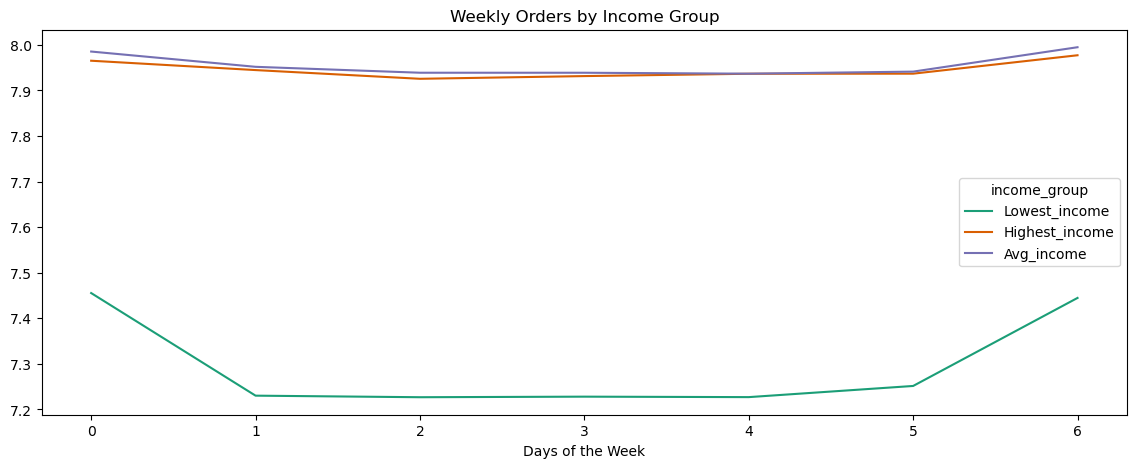

In [21]:
#linechart for DOW and income
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_income_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Weekly Orders by Income Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Income_group_dow.png')
plt.show()

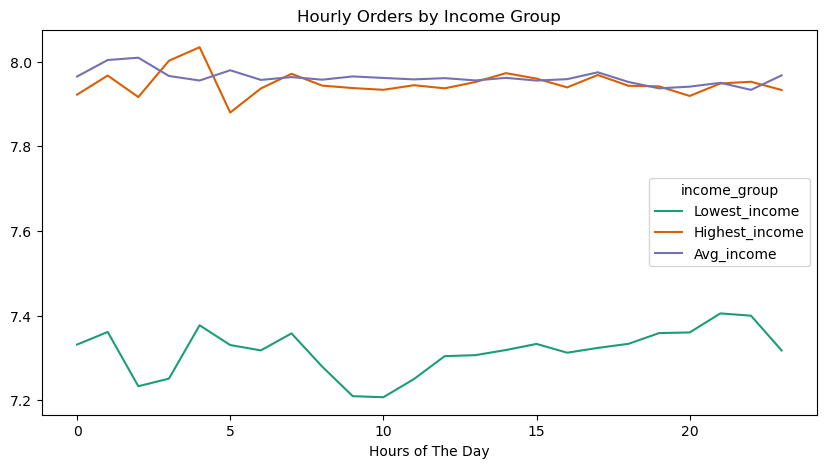

In [22]:
#linechart for HOD and income
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_income_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Hourly Orders by Income Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Income_group_HOD.png')
plt.show()

## Income_group:Regional_flag and Department Analysis

In [39]:
#aggregating 'order_id' and 'prices' from sample
df_income_group_sample_agg = df_income_group_sample.groupby(['department', 'income_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_income_group_sample_agg.head(3)

,department,income_group,regional_flag,order_id,prices
0,alcohol,Avg_income,Midwest,2535,21501.80
1,alcohol,Avg_income,Northeast,3080,24800.40
2,alcohol,Avg_income,South,5195,43902.80


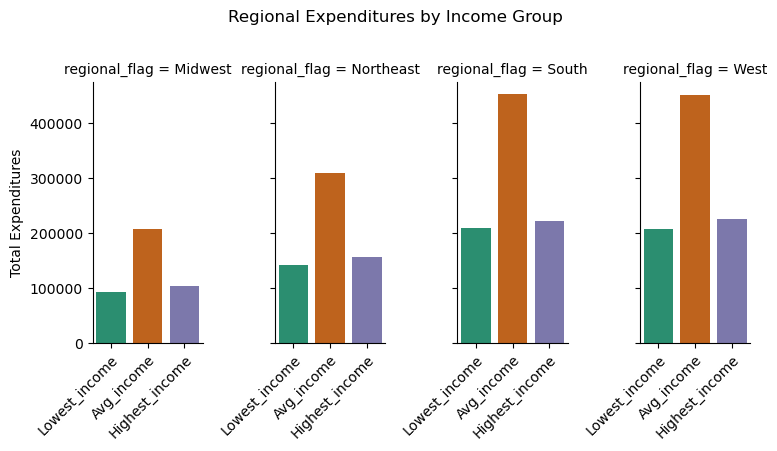

In [41]:
### FacetGrid for income_group and Revenue
g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "income_group", "prices", palette='Dark2',ci=None, order=['Lowest_income', 'Avg_income','Highest_income'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Income Group")
g.figure.subplots_adjust(top=.8)

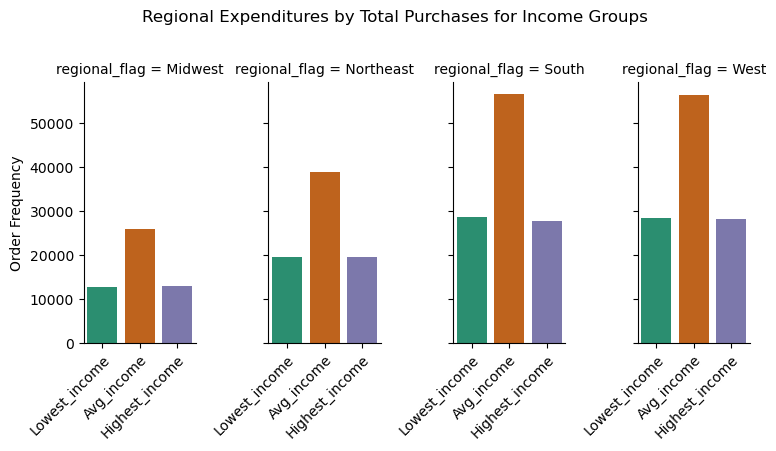

In [40]:
# FacetGrid for income_group and Total Purchases
g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "income_group", "order_id", palette='Dark2',ci=None, order=['Lowest_income', 'Avg_income','Highest_income'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases for Income Groups")
g.figure.subplots_adjust(top=.8)

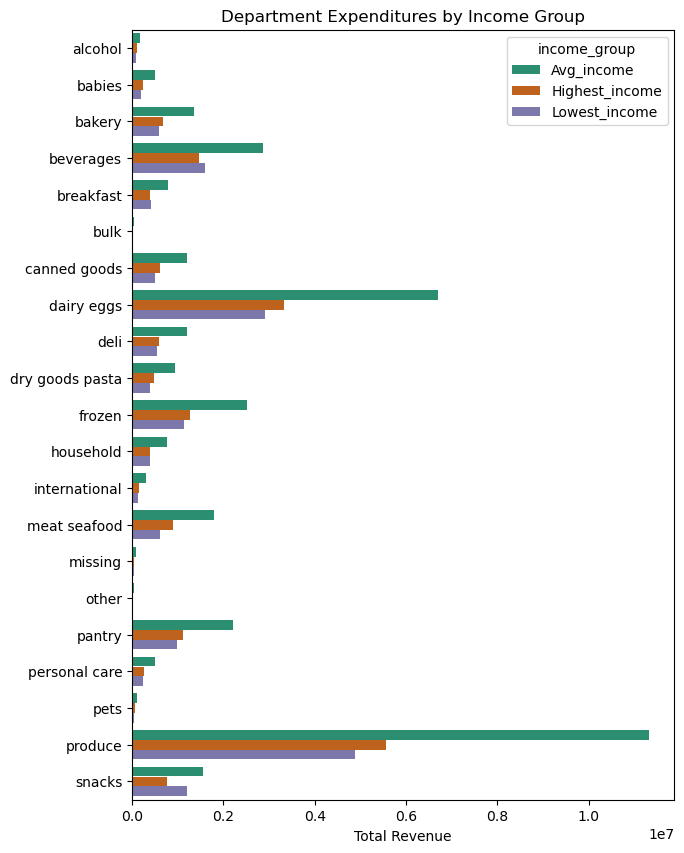

In [25]:
#barplot for income-group and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_income_group_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='income_group', 
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Income Group")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('income_group_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

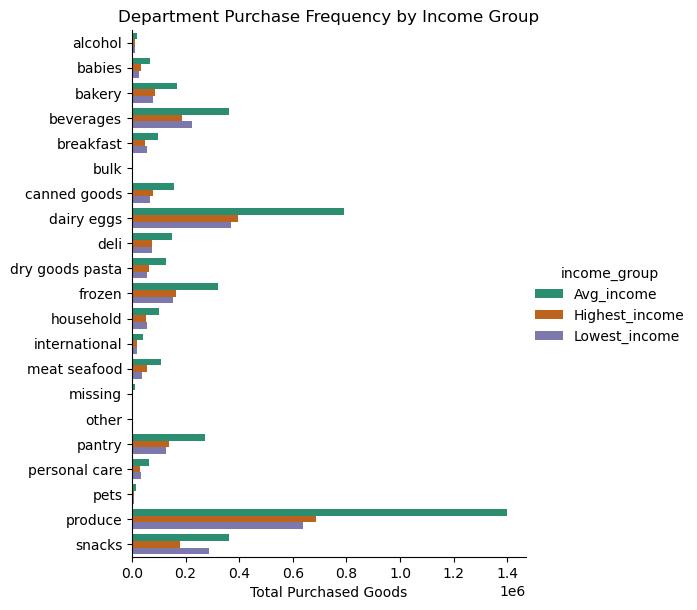

In [24]:
#barplot for income_group and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_income_group_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='income_group', 
             errorbar="sd",
             palette = 'Dark2',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Income Group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('income_group_freq_purchases.png')
plt.show()

## Income_group: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [74]:
# aggregated Data from TOTAL Dataset for income_group 
df_opd.groupby('income_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                
                    mean max min          sum mean   max  min
income_group                                                 
Avg_income         34.70  99   5 123163213.80 7.96 25.00 1.00
Highest_income     34.61  99   5  61515636.90 7.95 25.00 1.00
Lowest_income      33.70  99   5  56515384.90 7.30 25.00 1.00

# User Profile for Family Size

------------

## Family_size: Creating Flag for Family Status

In [28]:
#checking values of n_dependants column
df_opd['n_dependants'].value_counts()

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [29]:
#checking values of fam_status column
df_opd['fam_status'].value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [9]:
#Creating User flag for family_size 
df_opd.loc[(df_opd['fam_status'] == 'married') & (df_opd['n_dependants'] == 0), 'family_size'] = 'Married_no_kids'
df_opd.loc[(df_opd['fam_status'] == 'married') & (df_opd['n_dependants'] >= 1), 'family_size'] = 'Married_kids'
df_opd.loc[(df_opd['fam_status'] == 'single') & (df_opd['n_dependants'] >= 1), 'family_size'] = 'Single_kids'
df_opd.loc[(df_opd['fam_status'] == 'single') & (df_opd['n_dependants'] == 0), 'family_size'] = 'Single_no_kids'
df_opd.loc[(df_opd['fam_status'] == 'divorced/widowed') & (df_opd['n_dependants'] == 0), 'family_size'] = 'Divorced/widowed_no_kids'
df_opd.loc[(df_opd['fam_status'] == 'divorced/widowed') & (df_opd['n_dependants'] >= 1), 'family_size'] = 'Divorced/widowed_kids'
df_opd.loc[(df_opd['fam_status'] == 'living with parents and siblings') & (df_opd['n_dependants'] == 0), 'family_size'] = 'Living with family_no_kids'
df_opd.loc[(df_opd['fam_status'] == 'living with parents and siblings') & (df_opd['n_dependants'] >= 1), 'family_size'] = 'Living with family_kids'

#checking for NaN values
df_opd['family_size'].value_counts(dropna = False) 

family_size
Married_kids                21743711
Single_no_kids               5094410
Divorced/widowed_no_kids     2645271
Living with family_kids      1481172
Name: count, dtype: int64

In [40]:
#checking total row count
df_opd['family_size'].count

<bound method Series.count of 0           Married_kids
1           Married_kids
2           Married_kids
3           Married_kids
4           Married_kids
                ...     
30964559    Married_kids
30964560    Married_kids
30964561    Married_kids
30964562    Married_kids
30964563    Married_kids
Name: family_size, Length: 30964564, dtype: object>

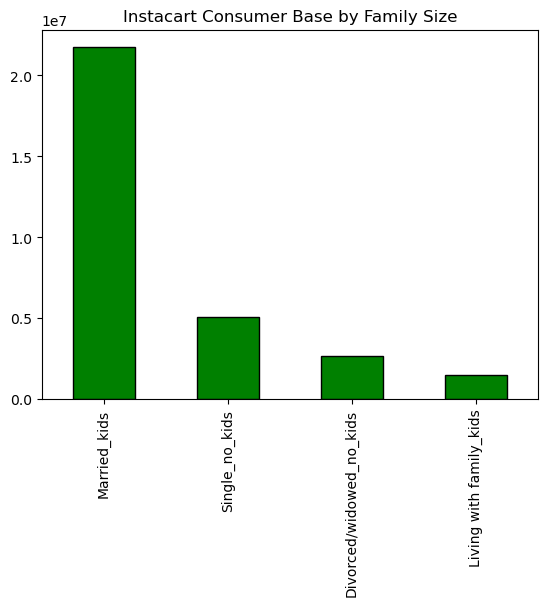

In [41]:
# creating bar object for family size to check distribution
family_size_bar =df_opd['family_size'].value_counts().plot.bar(title='Instacart Consumer Base by Family Size', xlabel='', ylabel='', color='green', edgecolor='black')
plt.savefig('family_size_bar.png')
plt.show()

### - Sampling Data Set

Copy pasting data set from age_group to include new flag 'family_size'

In [11]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_opd)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_opd_big3 = df_opd[dev]
df_opd_small3 = df_opd[~dev]

#quality check
len(df_opd_big3)+len(df_opd_small3)

30964564

## Family_size:Profile Creation

In [20]:
# user_profile of subset of 30% sample df_opd_small2 only containing necessary columns for analysis
df_family_size_sample = df_opd_small3[['family_size','income','orders_day_of_week', 'order_hour_of_day','department','prices','order_id','regional_flag']]
df_family_size_sample.head()

,family_size,income,orders_day_of_week,order_hour_of_day,department,prices,order_id,regional_flag
0,Married_kids,40423,2,8,beverages,9.00,2539329,South
2,Married_kids,40423,3,12,beverages,9.00,473747,South
3,Married_kids,40423,4,7,beverages,9.00,2254736,South
6,Married_kids,40423,1,9,beverages,9.00,550135,South
10,Married_kids,40423,1,14,beverages,13.40,3108588,South


## Family_size: Visualizations

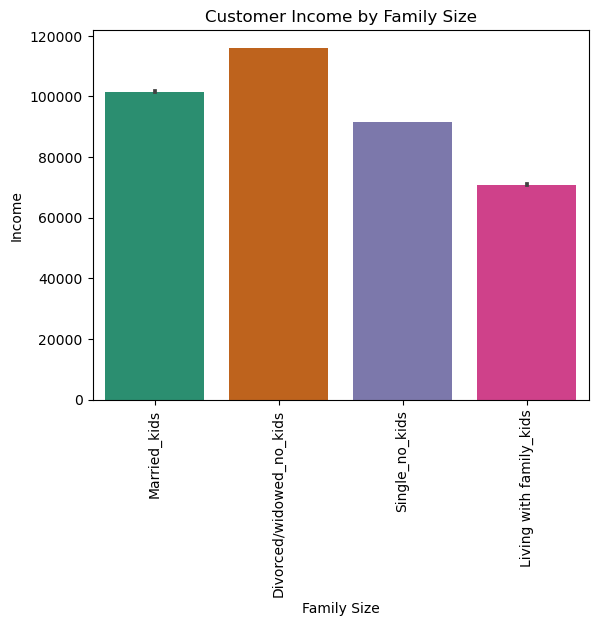

In [17]:
#creating scatterplot for family_size and income and saving it as PNG
Family_size_scatter = sns.barplot(data = df_family_size_sample, x='family_size', y='income', palette='Dark2').set(title='Customer Income by Family Size',xlabel = 'Family Size', ylabel = 'Income')
plt.savefig('Family_size_income.png')
plt.xticks(rotation='vertical')
plt.show()

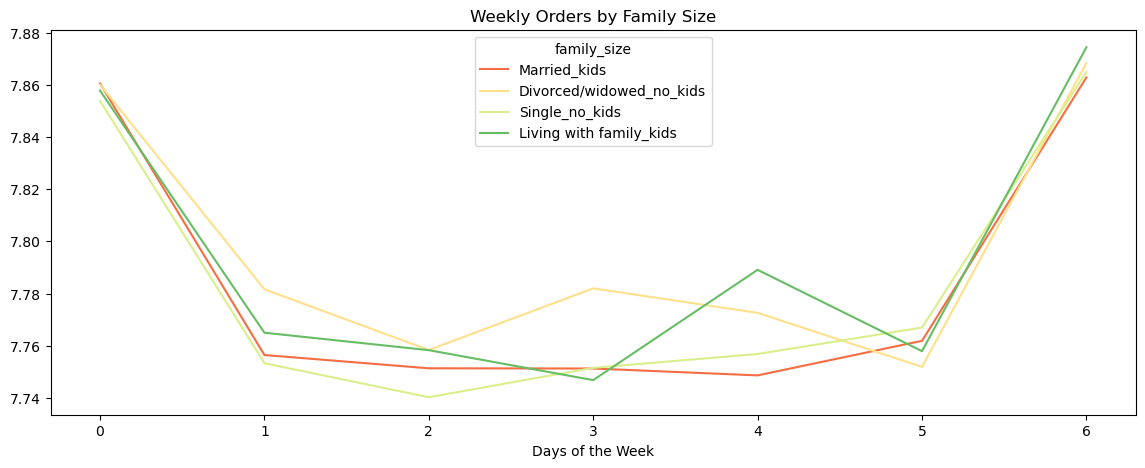

In [52]:
#linechart for DOW and family size
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_family_size_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='family_size', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Weekly Orders by Family Size")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('family_size_dow.png')
plt.show()

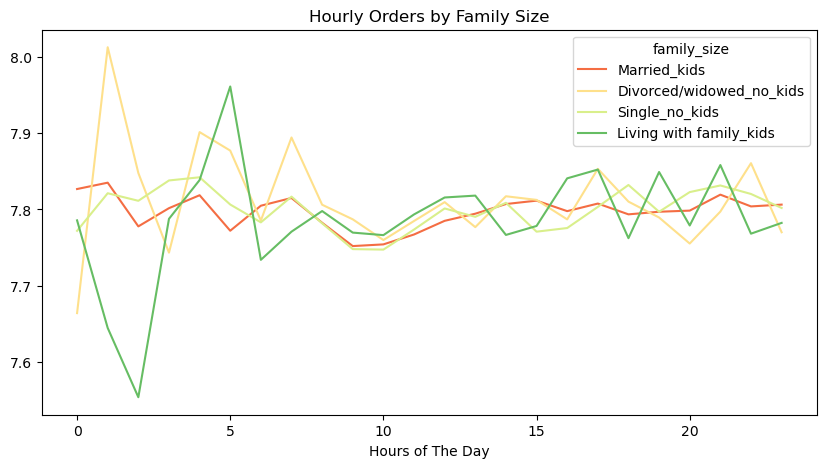

In [53]:
#linechart for HOD and family size
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_family_size_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='family_size', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Hourly Orders by Family Size")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('family_size_HOD.png')
plt.show()

## Family_size:Regional_flag and Department Analysis

In [21]:
#aggregating 'order_id' and 'prices' from sample
df_family_size_sample_agg = df_family_size_sample.groupby(['department', 'family_size','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_family_size_sample_agg.head(3)

,department,family_size,regional_flag,order_id,prices
0,alcohol,Divorced/widowed_no_kids,Midwest,506,4433.50
1,alcohol,Divorced/widowed_no_kids,Northeast,496,3942.70
2,alcohol,Divorced/widowed_no_kids,South,980,7337.50


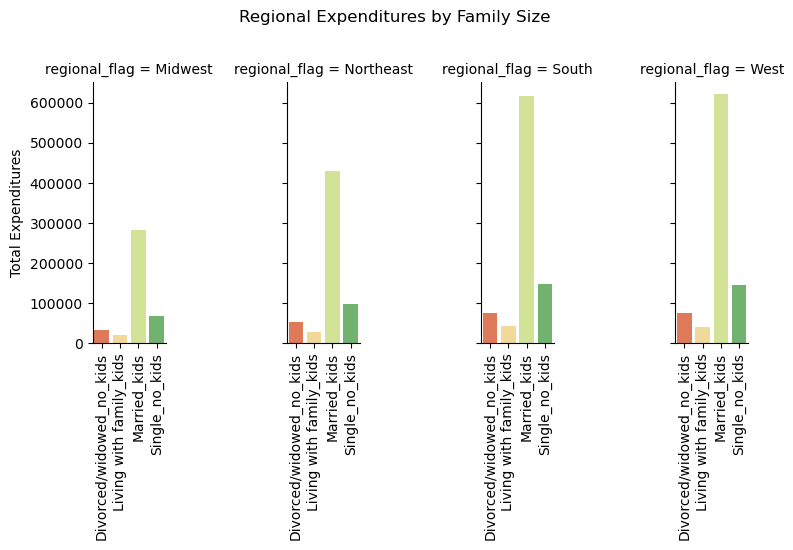

In [29]:
### FacetGrid for family_size and Revenue
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "family_size", "prices", palette='RdYlGn',ci=None)

g.set_xticklabels(rotation='vertical')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Family Size")
g.figure.subplots_adjust(top=.8)

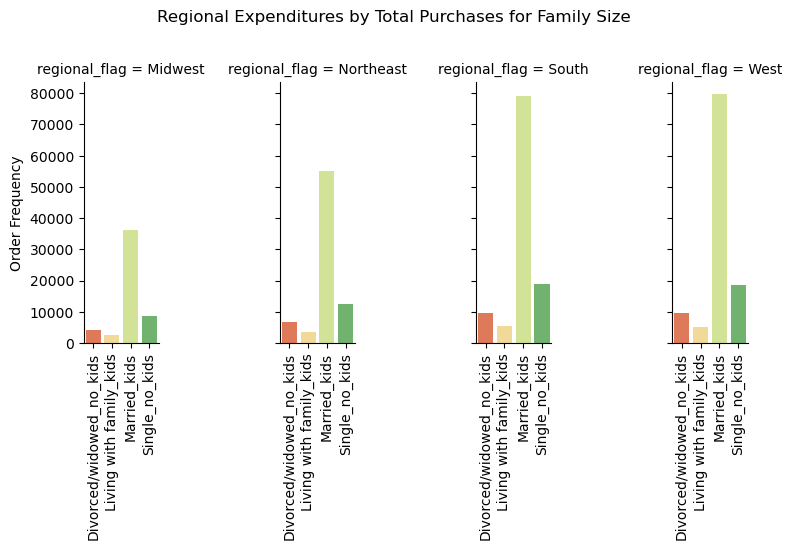

In [28]:
# FacetGrid for family_size and Total Purchases
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "family_size", "order_id", palette='RdYlGn',ci=None)

g.set_xticklabels(rotation='vertical')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Total Purchases for Family Size")
g.figure.subplots_adjust(top=.8)

<Figure size 700x1000 with 0 Axes>

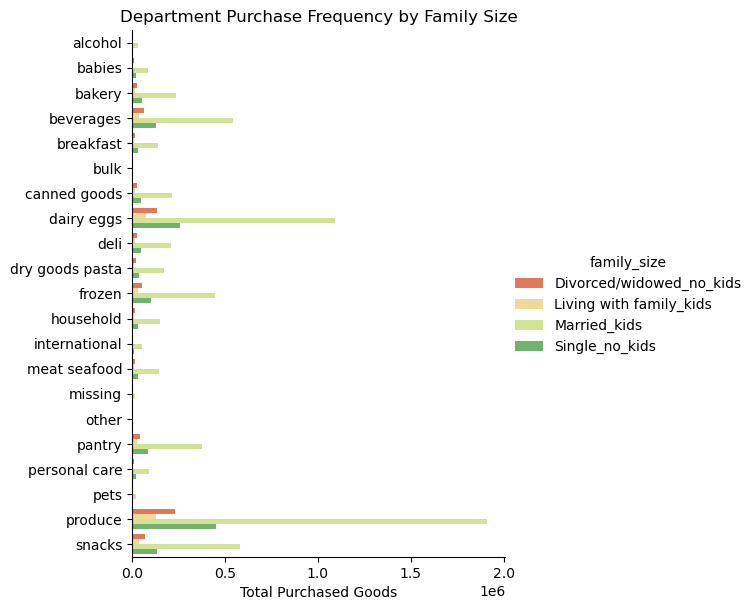

In [57]:
#barplot for family size and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_family_size_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='family_size', 
             errorbar="sd",
             palette = 'RdYlGn',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Family Size")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('family_size_freq_purchases.png')
plt.show()

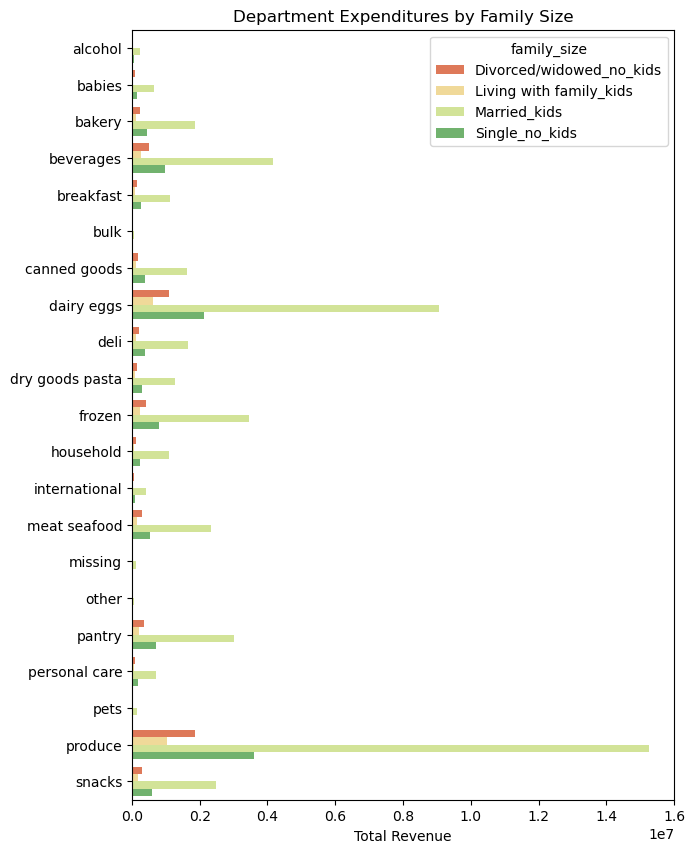

In [56]:
#barplot for family_size and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_family_size_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='family_size', 
             palette = 'RdYlGn',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Family Size")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('family_size_department_Expenditures.png')
plt.show()

## Family_size: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [73]:
# aggregated Data from TOTAL Dataset for family_size
df_opd.groupby('family_size').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                
                              mean max min          sum mean   max  min
family_size                                                            
Divorced/widowed_no_kids     34.71  99   5  20632363.50 7.80 25.00 1.00
Living with family_kids      34.85  99   5  11552531.10 7.80 25.00 1.00
Married_kids                 34.31  99   5 169362211.80 7.79 25.00 1.00
Single_no_kids               34.66  99   5  39647129.20 7.78 25.00 1.00

-----

# User Profile Loyalty Flag

## Loyalty_Flag: Creation of Profile

In [30]:
# user_profile of subset of 30% sample df_opd_small3 only containing necessary columns for analysis
df_loyalty_sample = df_opd_small3[['loyalty_flag','orders_day_of_week','days_since_prior_order', 'order_hour_of_day','department','prices','order_id','regional_flag']]
df_loyalty_sample.head()

,loyalty_flag,orders_day_of_week,days_since_prior_order,order_hour_of_day,department,prices,order_id,regional_flag
0,New customer,2,NaN,8,beverages,9.00,2539329,South
2,New customer,3,21.00,12,beverages,9.00,473747,South
3,New customer,4,29.00,7,beverages,9.00,2254736,South
6,New customer,1,20.00,9,beverages,9.00,550135,South
10,New customer,1,14.00,14,beverages,13.40,3108588,South


## Loyalty_Flag: Visualizations

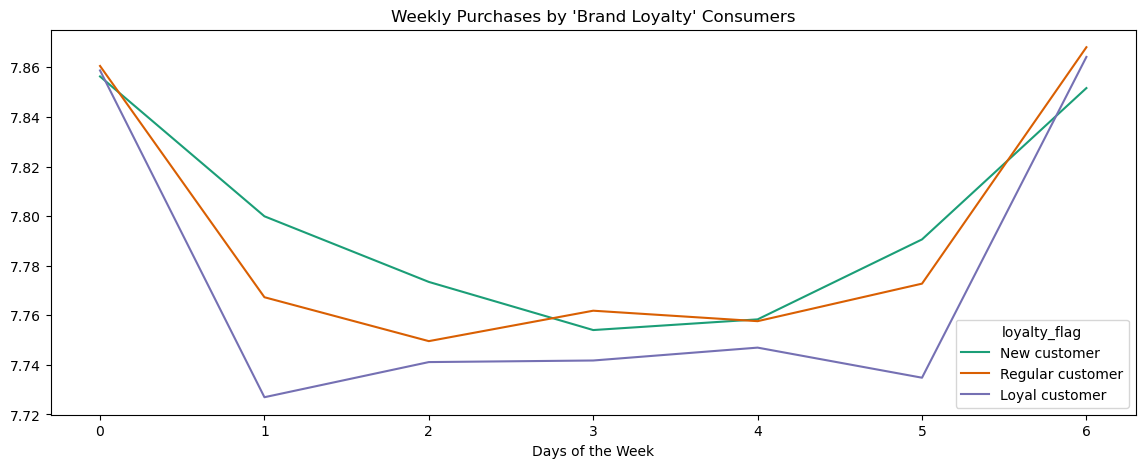

In [66]:
#linechart for DOW and Loyalty
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_loyalty_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Weekly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Loyalty_dow.png')
plt.show()

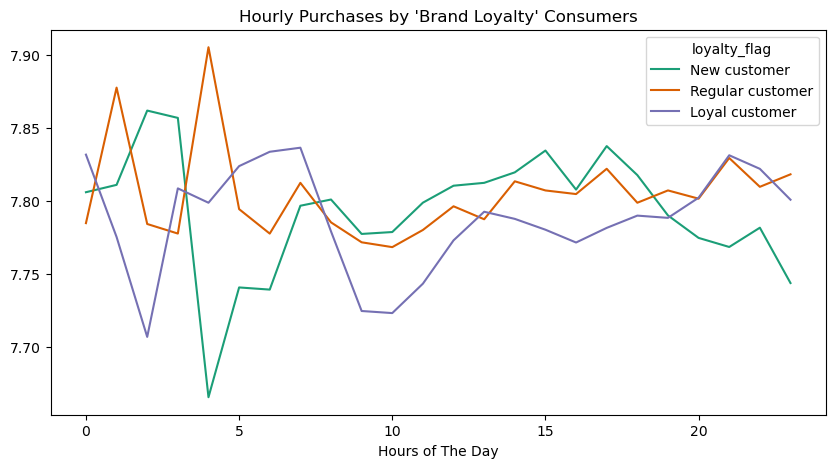

In [67]:
#linechart for HOD and Loyalty
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_loyalty_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Hourly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('loyal_HOD.png')
plt.show()

## Loyalty_flag: Regional_flag and Department Analysis

In [31]:
#aggregating 'order_id' and 'prices' from sample
df_loyalty_sample_agg = df_loyalty_sample.groupby(['department', 'loyalty_flag','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_loyalty_sample_agg.head(3)

,department,loyalty_flag,regional_flag,order_id,prices
0,alcohol,Loyal customer,Midwest,1636,13824.20
1,alcohol,Loyal customer,Northeast,1952,15197.70
2,alcohol,Loyal customer,South,3139,25493.80


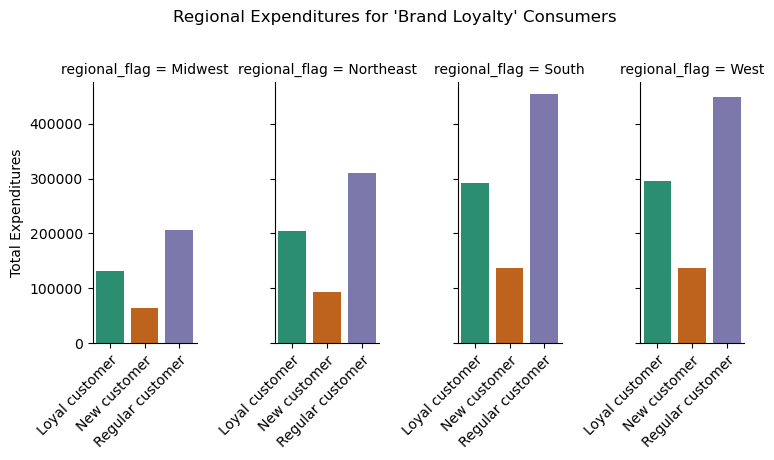

In [35]:
### FacetGrid for loyalty_flag and Revenue
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "loyalty_flag", "prices", palette='Dark2',ci=None)

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures for 'Brand Loyalty' Consumers")
g.figure.subplots_adjust(top=.8)

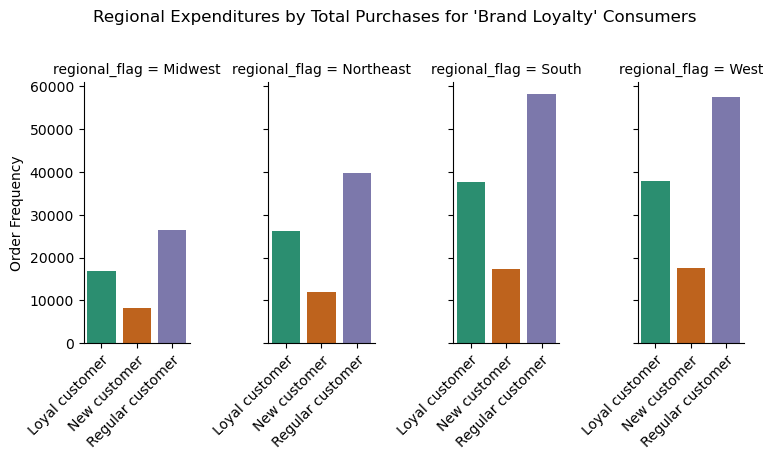

In [34]:
# FacetGrid for loyalty_flag and Total Purchases
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "loyalty_flag", "order_id", palette='Dark2',ci=None)

g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases for 'Brand Loyalty' Consumers")
g.figure.subplots_adjust(top=.8)

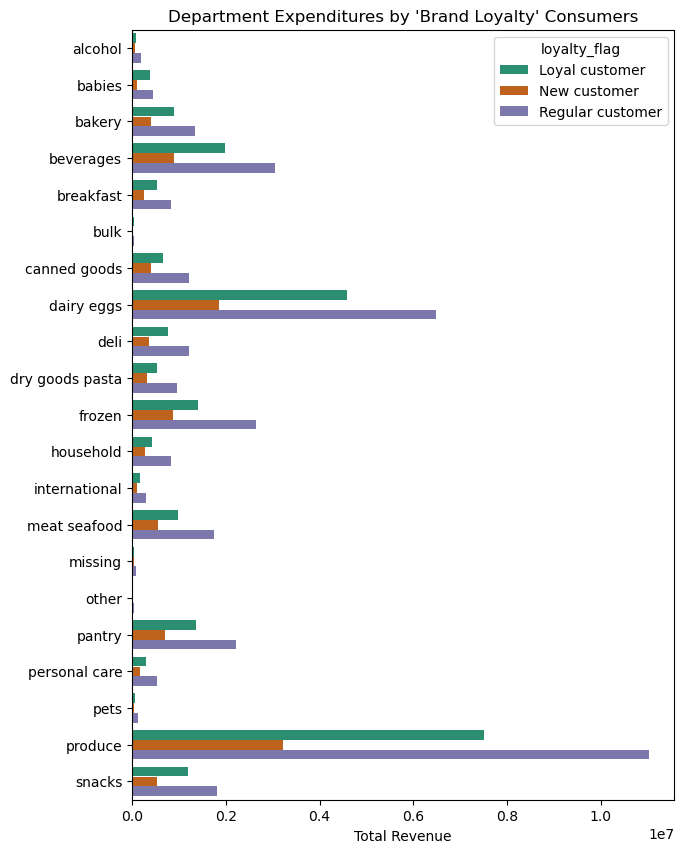

In [69]:
#barplot for loyalty and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_loyalty_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by 'Brand Loyalty' Consumers")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('loyalty_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

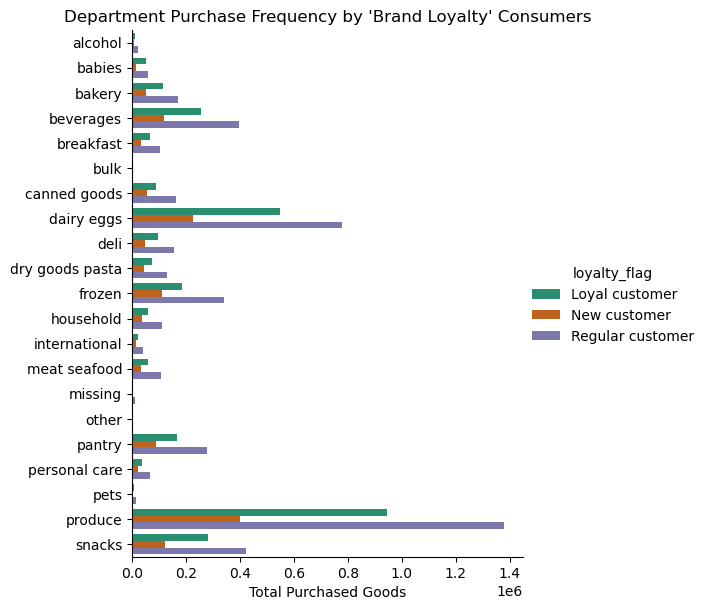

In [70]:
#barplot for loyalty and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_loyalty_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='loyalty_flag', 
             errorbar="sd",
             palette = 'Dark2',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by 'Brand Loyalty' Consumers")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('loyalty_freq_purchases.png')
plt.show()

## Loyalty_flag: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [72]:
# aggregated Data from TOTAL Dataset for loyalty_flag
df_opd.groupby('loyalty_flag').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order               prices                
                      mean max min          sum mean   max  min
loyalty_flag                                                   
Loyal customer       63.98  99  41  79933825.20 7.77 25.00 1.00
New customer          7.49  10   5  37469804.20 7.80 25.00 1.00
Regular customer     23.43  40  11 123790606.20 7.80 25.00 1.00

---------------

# Department and Product Further Analysis

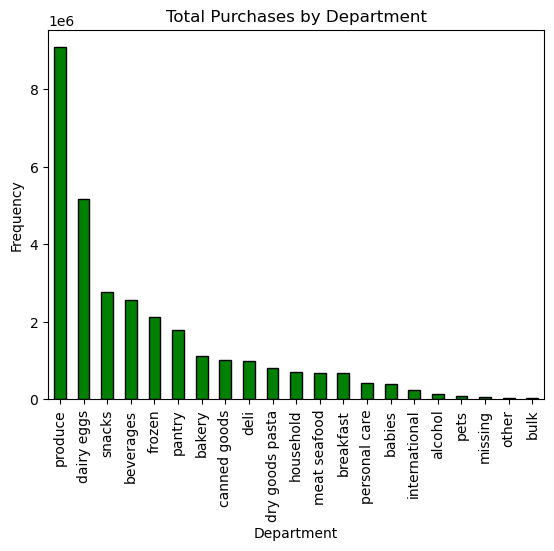

In [82]:
# creating bar object for department frequency count
department_bar_count =df_opd['department'].value_counts().plot.bar(title='Total Purchases by Department', xlabel='Department', ylabel='Frequency', color='green', edgecolor='black')
plt.savefig('department_bar_count.png')
plt.show()

### Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [86]:
# Aggregated Data from TOTAL Dataset for department
df_opd.groupby('department').agg({'max_order': ['mean','max','min'], 'prices': ['mean','sum','max','min'], 'orders_day_of_week': ['mean'], 'order_hour_of_day': ['mean', 'min', 'max']})

max_order         prices                         \
                     mean max min   mean         sum   max  min   
department                                                        
alcohol             31.64  99   5   8.15  1178811.10 15.00 1.00   
babies              39.00  99   5   7.63  3133096.40 15.00 1.00   
bakery              34.81  99   5   7.86  8806886.20 15.00 1.00   
beverages           34.52  99   5   7.68 19758773.90 15.00 1.00   
breakfast           34.22  99   5   8.03  5388030.20 14.90 1.00   
bulk                39.04  99   5   8.35   279212.80 14.10 1.40   
canned goods        31.81  99   5   7.55  7637778.50 15.00 1.00   
dairy eggs          35.64  99   5   8.34 43118260.70 15.00 1.00   
deli                33.76  99   5   7.78  7813188.10 15.00 1.00   
dry goods pasta     32.14  99   5   7.35  6042181.40 15.00 1.00   
frozen              31.76  99   5   7.73 16408884.00 15.00 1.00   
household           31.39  99   5   7.38  5164910.30 15.00 1.00   
international       33.04  99   5   7.68  1965702.90 15.00 1.00   
meat seafood        32.52  99   5  16.30 10998953.40 25.00 8.00   
missing             31.17  99   5   8.66   560933.30 15.00 1.00   
other               33.46  99   5   6.96   239569.20 15.00 1.10   
pantry              33.51  99   5   8.01 14287456.50 20.00 1.00   
personal care       32.01  99   5   8.00  3393915.00 15.00 1.00   
pets                30.90  99   5   7.89   734009.70 15.00 1.00   
produce             35.37  99   5   7.98 72455761.70 15.00 1.00   
snacks              34.74  99   5   4.28 11827920.30  7.00 1.60   

                orders_day_of_week order_hour_of_day          
                              mean              mean min max  
department                                                    
alcohol                       3.17             13.58   0  23  
babies                        2.71             13.39   0  23  
bakery                        2.75             13.38   0  23  
beverages                     2.81             13.30   0  23  
breakfast                     2.73             13.31   0  23  
bulk                          2.76             13.44   0  23  
canned goods                  2.71             13.44   0  23  
dairy eggs                    2.74             13.35   0  23  
deli                          2.71             13.47   0  23  
dry goods pasta               2.69             13.53   0  23  
frozen                        2.79             13.67   0  23  
household                     2.84             13.34   0  23  
international                 2.69             13.50   0  23  
meat seafood                  2.72             13.46   0  23  
missing                       2.80             13.44   0  23  
other                         2.85             13.49   0  23  
pantry                        2.81             13.44   0  23  
personal care                 2.82             13.48   0  23  
pets                          2.93             13.57   0  23  
produce                       2.69             13.41   0  23  
snacks                        2.75             13.35   0  23

## Top 10 Produce Items subset

In [83]:
#creating df_popular_products
df_popular_products = df_opd.loc[df_opd['department'].isin(['produce'])]
df_popular_products.shape

(9079273, 33)

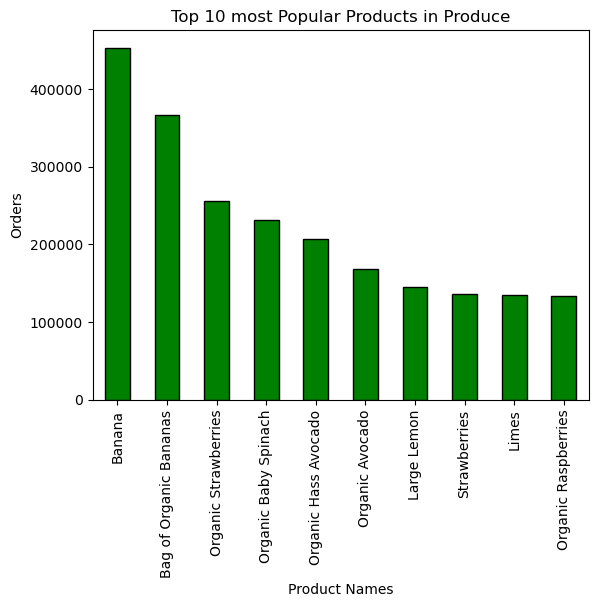

In [84]:
#creating barchart for top 10 most popular products
popular_products_barchart = df_popular_products['product_name'].value_counts()[:10].plot.bar(title='Top 10 most Popular Products in Produce', xlabel='Product Names', ylabel='Orders', color='green', edgecolor='black')
plt.savefig('popular_products_barchart.png')
plt.show()

# Exporting Data

## Cleaning up Dataset before Export 

In [21]:
#droppping _merge column
df_opd = df_opd.drop(columns=['_merge'])

In [47]:
#Final Column Check
df_opd

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,Gender,state_usa,Age,date_joined,n_dependants,fam_status,income,price_range_loc,busiest_period_of_day,busiest_days,loyalty_flag,spending_flag,FRQ_prior_order_flag,regional_flag,max_order,Customer_activity,department,age_group,income_group,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,regularly busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income,Married_kids
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income,Married_kids
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income,Married_kids
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,least orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income,Married_kids
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Female,Alabama,31,2/17/2019,3,married,40423,Mid-range product,most orders,least busy days,New customer,Low spender,Non-frequent customer,South,10,Active,beverages,28_37,Lowest_income,Married_kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,525976,58201,24,6,16,3.00,5161,1,1,Dried Mango,18,10,6.10,Male,Florida,75,2/8/2019,2,married,138066,Mid-range product,most orders,regularly busy days,Regular customer,Low spender,Regular customer,South,28,Active,bulk,68_over,Highest_income,Married_kids
30964560,758290,58201,26,0,12,9.00,5161,1,1,Dried Mango,18,10,6.10,Male,Florida,75,2/8/2019,2,married,138066,Mid-range product,most orders,busiests days,Regular customer,Low spender,Regular customer,South,28,Active,bulk,68_over,Highest_income,Married_kids
30964561,460711,58201,27,6,9,13.00,5161,1,1,Dried Mango,18,10,6.10,Male,Florida,75,2/8/2019,2,married,138066,Mid-range product,least orders,regularly busy days,Regular customer,Low spender,Regular customer,South,28,Active,bulk,68_over,Highest_income,Married_kids
30964562,1605789,58201,28,5,7,27.00,5161,1,1,Dried Mango,18,10,6.10,Male,Florida,75,2/8/2019,2,married,138066,Mid-range product,least orders,regularly busy days,Regular customer,Low spender,Regular customer,South,28,Active,bulk,68_over,Highest_income,Married_kids


## Export

In [50]:
#Export orders_products_active as PKL
df_opd.to_pickle(os.path.join(path,'Data','Prepared Data','Orders_products_departments_active.pkl'))